In [1]:
import pandas as pd 
import numpy as np

In [2]:
#loading data and making data frame
# class and 50 features
aco=pd.read_csv("Acoustic Features.csv")
aco.shape

(400, 51)

In [ ]:
#making list of class 
originalclass = list(aco['Class'])
#print(aco)

#droping class from data for scaling
aco.drop(labels="Class",axis=1, inplace=True )
#axis=1 refers to columns and 0 to rows

#print(aco)

In [5]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(aco)
aco_scaled=scaler.transform(aco)
print(aco_scaled.mean(axis=0))
print(aco_scaled.std(axis=0))
# 1 refers to sample and 0 is feature

type(aco_scaled) # type = ndarray 


[ 1.24344979e-16 -2.22044605e-16  7.10542736e-17  1.86517468e-16
  4.44089210e-17  2.66453526e-17  8.88178420e-17  0.00000000e+00
  6.43929354e-17  4.44089210e-17  0.00000000e+00  8.88178420e-18
 -8.88178420e-18 -1.55431223e-17 -8.88178420e-18 -6.66133815e-18
 -1.55431223e-17 -5.32907052e-17  0.00000000e+00 -1.24344979e-16
 -3.90798505e-16  2.10942375e-17  8.88178420e-17  1.77635684e-16
  1.06581410e-16 -2.22044605e-16  5.32907052e-17  5.32907052e-17
 -1.06581410e-16 -8.88178420e-18 -1.11022302e-16  7.28306304e-16
  3.55271368e-17 -3.55271368e-17 -7.99360578e-17 -1.19904087e-16
  1.15463195e-16  1.77635684e-17  1.77635684e-17 -1.99840144e-16
  1.46549439e-16  2.57571742e-16  2.39808173e-16  8.88178420e-17
 -3.37507799e-16  2.30926389e-16 -1.11022302e-17 -6.21724894e-17
  2.13162821e-16 -1.10245146e-15]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1.]


numpy.ndarray

In [6]:
print(aco_scaled)
acoo = pd.DataFrame(data=aco_scaled,index=[i for i in range(aco_scaled.shape[0])],columns=['f'+str(i) for i in range(aco_scaled.shape[1])])
#aco_scaled["Class"]=originalclass
acoo.insert(0,"Class",originalclass,True)
#print(acoo)

[[-1.28562787  0.73777505  0.87387422 ... -0.78271248 -2.45344953
   0.85686847]
 [-0.15010658 -2.26106992 -0.20459929 ...  1.72377548 -0.93991736
   0.07493527]
 [-1.37895839  1.68477873  1.5070822  ... -0.08640603 -1.07877352
  -0.96764234]
 ...
 [ 0.81430876  0.06698078 -1.06351386 ...  1.72377548  0.68469974
  -1.22828674]
 [ 0.08321971  0.38264867 -1.17504981 ...  1.72377548  0.57361481
   0.59622407]
 [-0.75675494 -1.55081717 -0.7916999  ... -1.20673835  1.08738261
  -0.44635354]]


In [7]:
#making new lists as new columns
classrelax=[]
classhappy=[]
classsad=[]
classangry=[]

#creating and quantify lists

# relax    
for i in range(acoo.shape[0]):
    if acoo.iloc[i,0]=="relax":
        classrelax.append(1)
    else :
        classrelax.append(0)  
#happy        
for i in range(acoo.shape[0]):
    if acoo.iloc[i,0]=="happy":
        classhappy.append(1)
    else :
        classhappy.append(0)
#sad
for i in range(acoo.shape[0]):
    if acoo.iloc[i,0]=="sad":
        classsad.append(1)
    else :
        classsad.append(0)
#angry        
for i in range(acoo.shape[0]):
    if acoo.iloc[i,0]=="angry":
        classangry.append(1)
    else :
        classangry.append(0)
        

In [8]:
##adding list to acoo(our data)
acoo["classrelax"]=classrelax
acoo["classhappy"]=classhappy
acoo["classsad"]=classsad
acoo["classangry"]=classangry


In [9]:
#spliting data to train and test
from sklearn.model_selection import train_test_split
train , test = train_test_split(acoo , test_size=0.3, random_state=1)

In [10]:
#specifying feature and target

x_train = train.iloc[:,1:] 
x_test = test.iloc[:,1:]


# relax = 1
y1_train =x_train["classrelax"]
y1_test = x_test["classrelax"]
##happy = 2
y2_train=x_train["classhappy"]
y2_test=x_test["classhappy"]
# sad = 3
y3_train=x_train["classsad"]
y3_test=x_test["classsad"]
# angry = 4
y4_train=x_train["classangry"]
y4_test=x_test["classangry"]

#######
print(train.shape)
print(x_test.shape)
print(x_train.shape)
print(type(x_train))

(280, 55)
(120, 54)
(280, 54)
<class 'pandas.core.frame.DataFrame'>


In [11]:
from sklearn.linear_model import LogisticRegression
clsfrelax=LogisticRegression()
clsfhappy=LogisticRegression()
clsfsad=LogisticRegression()
clsfangry=LogisticRegression()

In [12]:
#fitting classifier and train
clsfrelax.fit(x_train,y1_train)
clsfhappy.fit(x_train,y2_train)
clsfsad.fit(x_train,y3_train)
clsfangry.fit(x_train,y4_train)

LogisticRegression()

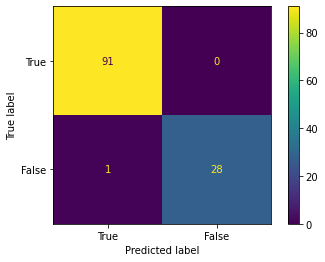

relax:
{'Accuracy': 0.9916666666666667, 'Precision': 1.0, 'Sensitivity_recall': 0.9655172413793104, 'F1_score': 0.9824561403508771}


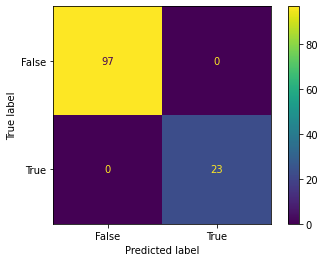

happy:
{'Accuracy': 1.0, 'Precision': 1.0, 'Sensitivity_recall': 1.0, 'F1_score': 1.0}


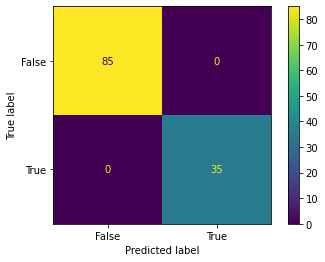

sad:
{'Accuracy': 1.0, 'Precision': 1.0, 'Sensitivity_recall': 1.0, 'F1_score': 1.0}


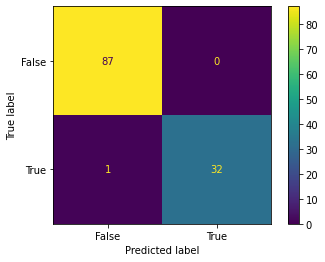

angry:
{'Accuracy': 0.9916666666666667, 'Precision': 1.0, 'Sensitivity_recall': 0.9696969696969697, 'F1_score': 0.9846153846153847}


In [13]:
from sklearn import metrics 
import matplotlib.pyplot as plt
#relax
predicted_r=clsfrelax.predict(x_test) #ndarray
actual_r=y1_test
confusion_matrix_r = metrics.confusion_matrix(actual_r, predicted_r)
cm_display_r = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_r, display_labels = [True, False])
cm_display_r.plot()
plt.show()

Accuracy_r = metrics.accuracy_score(actual_r, predicted_r)
Precision_r = metrics.precision_score(actual_r, predicted_r)
Sensitivity_recall_r = metrics.recall_score(actual_r, predicted_r)
F1_score_r = metrics.f1_score(actual_r, predicted_r)
print("relax:")
print({"Accuracy":Accuracy_r,"Precision":Precision_r,"Sensitivity_recall":Sensitivity_recall_r,"F1_score":F1_score_r}) 

#happy
predicted_h=clsfhappy.predict(x_test)
actual_h=y2_test
confusion_matrix_h = metrics.confusion_matrix(actual_h, predicted_h)
cm_display_h = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_h, display_labels = [False, True])
cm_display_h.plot()
plt.show() 

Accuracy_h = metrics.accuracy_score(actual_h, predicted_h)
Precision_h = metrics.precision_score(actual_h, predicted_h)
Sensitivity_recall_h = metrics.recall_score(actual_h, predicted_h)
F1_score_h = metrics.f1_score(actual_h, predicted_h)
print("happy:")
print({"Accuracy":Accuracy_h,"Precision":Precision_h,"Sensitivity_recall":Sensitivity_recall_h,"F1_score":F1_score_h}) 

#sad
predicted_s=clsfsad.predict(x_test)
actual_s=y3_test
confusion_matrix_s = metrics.confusion_matrix(actual_s, predicted_s)
cm_display_s = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_s, display_labels = [False, True])
cm_display_s.plot()
plt.show() 

Accuracy_s = metrics.accuracy_score(actual_s, predicted_s)
Precision_s = metrics.precision_score(actual_s, predicted_s)
Sensitivity_recall_s = metrics.recall_score(actual_s, predicted_s)
F1_score_s = metrics.f1_score(actual_s, predicted_s)
print("sad:")
print({"Accuracy":Accuracy_s,"Precision":Precision_s,"Sensitivity_recall":Sensitivity_recall_s,"F1_score":F1_score_s}) 

#angry
predicted_a=clsfangry.predict(x_test)
actual_a=y4_test
confusion_matrix_a = metrics.confusion_matrix(actual_a, predicted_a)
cm_display_a = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_a, display_labels = [False, True])
cm_display_a.plot()
plt.show()

Accuracy_a = metrics.accuracy_score(actual_a, predicted_a)
Precision_a = metrics.precision_score(actual_a, predicted_a)
Sensitivity_recall_a = metrics.recall_score(actual_a, predicted_a)
F1_score_a = metrics.f1_score(actual_a, predicted_a)
print("angry:")
print({"Accuracy":Accuracy_a,"Precision":Precision_a,"Sensitivity_recall":Sensitivity_recall_a,"F1_score":F1_score_a}) 


In [91]:
def whichclass(item):
    wcdict={}
    wcdict["realx"]=clsfrelax.predict_proba(item)[0,[1]][0]
    wcdict["happy"]=clsfhappy.predict_proba(item)[0,[1]][0]
    wcdict["sad"]=clsfsad.predict_proba(item)[0,[1]][0]
    wcdict["angry"]=clsfangry.predict_proba(item)[0,[1]][0]
    oficlclass=max(wcdict,key=wcdict.get)
    return oficlclass

In [84]:
# range from 0:1 to 119:120
print(whichclass(x_test.iloc[[1]]))
print(x_test.iloc[[1]])
#print(x_test[65:66])

happy
           f0        f1        f2        f3        f4        f5        f6  \
125  1.172076  0.244544 -0.173861  1.234428 -0.008046 -0.621546  0.519765   

           f7        f8        f9  ...       f44       f45       f46  \
125 -0.771215 -0.209746 -0.571539  ...  0.122406 -0.361393 -1.202949   

          f47       f48       f49  classrelax  classhappy  classsad  \
125 -0.086406  0.393102  0.856868           0           1         0   

     classangry  
125           0  

[1 rows x 54 columns]
